In [1]:
import h5py    
import numpy as np 
import matplotlib.pyplot as plt
from pyjet import cluster,DTYPE_PTEPM
import pandas as pd

In [4]:
f = pd.read_hdf('../h5files/events_anomalydetection.h5')

In [5]:
events_combined = f.T

In [32]:
np.shape(events_combined)


       0         1         2           3         4         5         6        \
0     0.324101  0.646304  0.325172    0.290918  0.526330  0.307490  0.305228   
1    -0.361158 -0.539460 -0.833948   -2.200063 -2.349110 -1.999438 -1.949587   
2     2.737669 -1.386258  2.404844    1.630132 -1.745532  2.590663 -2.294166   
3     0.409859  0.471293  1.295058    0.565028  0.542491  0.296564  0.611917   
4    -2.429939 -1.636572 -2.089618   -1.714345 -2.080352 -2.257138 -1.139748   
5     0.729830  0.751657 -1.873342   -2.617103 -3.044045  2.921109  1.495378   
6     0.867922  0.453769  0.451272    0.951042  0.390727  0.487133  0.527820   
7    -2.267777 -1.099593 -0.101877   -0.532720 -1.278563 -2.188060 -2.143983   
8    -1.161310 -0.393405  2.217348    2.941473 -2.131058  3.039020  1.894717   
9     0.383031  0.485929  0.461293    0.896248  2.530358  0.347837  0.307497   
10   -1.204714 -1.034489 -0.028984   -0.090743 -2.124421 -0.882748 -0.915048   
11    0.692571 -2.626943  0.748059   -1.

In [93]:
#Now, let's cluster some jets!
leadpT = {}
alljets = {}
for mytype in ['background','signal']:
    leadpT[mytype]=[]
    alljets[mytype]=[]
    for i in range(100): #len(events_combined)):
        if i%1000==0:
            print(mytype,i)
        issignal = events_combined[i][2100]
        if (mytype=='background' and issignal):
            continue
        elif (mytype=='signal' and issignal==0):
            continue
        pseudojets_input = np.zeros(len([x for x in events_combined[i][::3] if x > 0]), dtype=DTYPE_PTEPM)
        for j in range(700):
            if (events_combined[i][j*3]>0):
                pseudojets_input[j]['pT'] = events_combined[i][j*3]
                pseudojets_input[j]['eta'] = events_combined[i][j*3+1]
                pseudojets_input[j]['phi'] = events_combined[i][j*3+2]
        sequence = cluster(pseudojets_input, R=1.0, p=-1)
        jets = sequence.inclusive_jets(ptmin=20)
        leadpT[mytype] += [jets[0].pt]
        alljets[mytype] += [jets]


background 0
signal 0


In [97]:
#Now, let's cluster some jets more efficiently!
leadpT = {}
alljets = {}
for mytype in ['background','signal']:
    leadpT[mytype]=[]
    alljets[mytype]=[]
    for i in range(100): #len(events_combined)):
        if i%1000==0:
            print(mytype,i)
        issignal = events_combined[i][2100]
        if (mytype=='background' and issignal):
            continue
        elif (mytype=='signal' and issignal==0):
            continue
        pseudojets_input = np.zeros(len([x for x in events_combined[i][::3] if x > 0]), dtype=DTYPE_PTEPM)
        events_filled = events_combined[i][:np.shape(pseudojets_input)[0]*3].values.reshape(np.shape(pseudojets_input)[0], 3)

        pseudojets_input['pT'] = events_filled[:, 0]
        pseudojets_input['eta'] = events_filled[:, 1]
        pseudojets_input['phi'] = events_filled[:, 2]
        sequence = cluster(pseudojets_input, R=1.0, p=-1)
        jets = sequence.inclusive_jets(ptmin=20)
        leadpT[mytype] += [jets[0].pt]
        alljets[mytype] += [jets]

background 0
signal 0


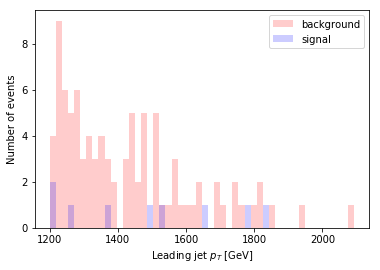

In [98]:
#Let's make some very simple plots.
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
n,b,p = plt.hist(leadpT['background'], bins=50, facecolor='r', alpha=0.2,label='background')
plt.hist(leadpT['signal'], bins=b, facecolor='b', alpha=0.2,label='signal')
plt.xlabel(r'Leading jet $p_{T}$ [GeV]')
plt.ylabel('Number of events')
plt.legend(loc='upper right')
plt.savefig("leadjetpt.pdf")

In [99]:
mjj={}
for mytype in ['background','signal']:
    mjj[mytype]=[]
    for k in range(len(alljets[mytype])):
        E = alljets[mytype][k][0].e+alljets[mytype][k][1].e
        px = alljets[mytype][k][0].px+alljets[mytype][k][1].px
        py = alljets[mytype][k][0].py+alljets[mytype][k][1].py
        pz = alljets[mytype][k][0].pz+alljets[mytype][k][1].pz
        mjj[mytype]+=[(E**2-px**2-py**2-pz**2)**0.5]


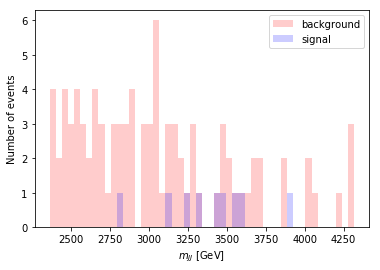

In [100]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
n,b,p = plt.hist(mjj['background'], bins=50, facecolor='r', alpha=0.2,label='background')
plt.hist(mjj['signal'], bins=b, facecolor='b', alpha=0.2,label='signal')
plt.xlabel(r'$m_{JJ}$ [GeV]')
plt.ylabel('Number of events')
plt.legend(loc='upper right')
plt.savefig("mjj.pdf")